**Brian Blaylock**  
**May 15, 2019**

# **Fig. 7.** GLM flash count

![](./figs/Fig-03_GLM-flashes-count-by-month.png)

> FIG. 3. Mean number of GLM flashes for May through September 2018 within the HRRR domain, western, central, and eastern United States (see figure 3).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
from matplotlib.path import Path
import itertools

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [5.5,4]
mpl.rcParams['figure.titlesize'] = 10
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['axes.labelsize'] = 7
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['grid.alpha'] = .5
#mpl.rcParams['figure.subplot.wspace'] = 0.15
#mpl.rcParams['figure.subplot.hspace'] = 0.15

mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .95
mpl.rcParams['legend.labelspacing'] = 0.25
mpl.rcParams['legend.handlelength'] = 1
mpl.rcParams['legend.handletextpad'] = 0.5
mpl.rcParams['legend.borderaxespad'] = 0.3
mpl.rcParams['legend.loc'] = 'upper right'
mpl.rcParams['legend.columnspacing'] = 1.0

mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 600

In [5]:
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')

In [6]:
domains = ['HRRR', 'West', 'Central', 'East']

In [7]:
def get_HRRR_GLM_stats_hov_by_month(DOMAIN, month, years=[2018, 2019], verbose=False):
    samples = []
    first = True
    for hour in HOURS:
        DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_contingency_table'
        FILES = ['/%s/%s_%s_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, year, month, hour) for year in years]
        
        FLASH_DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/HRRR_GLM_hit_rate_data/'
        FLASH_FILES = ['/GLM_in_HRRR_%s_%s_m%02d_h%02d.csv' % (DOMAIN, year, month, hour) for year in years]
        
        #print(FLASH_FILES)
        
        mean_flashes = []
        mean_events = []
        sample_sum = []
        if all([os.path.exists(DIR+F) for F in FILES]):
            data = [np.genfromtxt(DIR+F, delimiter=',', names=True, dtype=None, encoding='UTF-8') for F in FILES]
            
            try:
                flash_data = [np.genfromtxt(FLASH_DIR+F, delimiter=',', names=True, dtype=None, encoding='UTF-8') for F in FLASH_FILES]
            except:
                if verbose: print('ERROR FLASH:', month, year, hour )
                flash_data = {'GLM_FLASH_COUNT':[np.nan, np.nan, np.nan]}
            
            try:
                dates = list(itertools.chain(*[i['DATE'] for i in data]))
                samples.append(len(dates))
            except:
                samples.append(1)
            #print(data['DATE'])
            
            events = list(itertools.chain(*[i['GLM_Event_COUNT'] for i in data]))
            flashes = list(itertools.chain(*[i['GLM_FLASH_COUNT'] for i in flash_data]))
            mean_events.append(np.nanmean(events))
            mean_flashes.append(np.nanmean(flashes))

            if first:
                mean_events_HOV = np.array(mean_events)
                mean_flashes_HOV = np.array(mean_flashes)
            else:
                mean_events_HOV = np.vstack([mean_events_HOV, mean_events])
                mean_flashes_HOV = np.vstack([mean_flashes_HOV, mean_flashes])
        else:
            samples.append(0)
            if first:
                mean_events_HOV = np.arange(1,19)*np.nan
                mean_flashes_HOV = np.arange(1,19)*np.nan
            else:
                mean_events_HOV = np.vstack([mean_events_HOV, np.arange(1,19)*np.nan])
                mean_flashes_HOV = np.vstack([mean_flashes_HOV, np.arange(1,19)*np.nan])
        first = False
    return {'samples': samples,
            'events': mean_events_HOV,
            'flashes': mean_flashes_HOV
           }

Working on: HRRR
Working on: West
Working on: Central
Working on: East


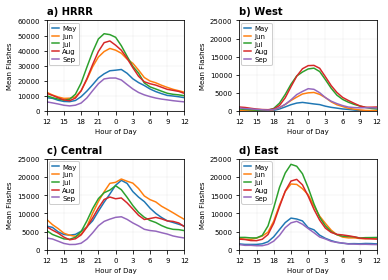

In [8]:
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

# Hours plot order (plot maximum lightning in the center of the plot 1200 UTC to 1200 UTC and not 0000 UTC to 2400 UTC)
HOURS = list(range(12,24))+list(range(0,12))+[12]

#for i, DOMAIN in enumerate(['HRRR']):
flash_count = {}
for D in domains:
    flash_count[D] = np.array([])

for ax, DOM, lab in zip(axes, domains, ['a)', 'b)', 'c)', 'd)']):
    print('Working on:', DOM)
    plt.sca(ax)
    for m in range(5,10):
        flashes = get_HRRR_GLM_stats_hov_by_month(DOM, m)['flashes']
        plt.plot(flashes, label='%s' % datetime(2018, m, 1).strftime("%b"))
        flash_count[DOM] = np.append(flash_count[DOM], np.sum(flashes))
    plt.xticks(np.array(range(0,25,3)), np.array(HOURS[::3]))
    plt.title(lab+' '+DOM, loc='left', fontweight='bold')
    plt.xlabel('Hour of Day')
    if DOM == 'HRRR':
        plt.ylim(ymax=60000)
        plt.legend(loc='upper left')
    else:
        plt.ylim(ymax=25000)
        plt.legend(loc='upper left')
    plt.xlim([0,24])
    plt.ylim(ymin=0)
    plt.ylabel('Mean Flashes')
    plt.grid()

plt.tight_layout()
    
plt.savefig('./figs/Fig-03_GLM-flashes-count-by-month')

In [9]:
for D in domains:
    print('%s \tTotal Mean Flashes: %.1f' % (D[:4], np.sum(flash_count[D])))

HRRR 	Total Mean Flashes: 2312887.7
West 	Total Mean Flashes: 329014.1
Cent 	Total Mean Flashes: 1083663.3
East 	Total Mean Flashes: 749861.9


# May 2018 versus May 2019

Working on: HRRR
Working on: West
Working on: Central
Working on: East


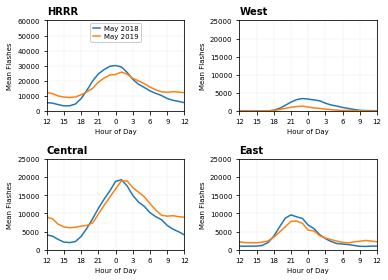

In [11]:
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

#for i, DOMAIN in enumerate(['HRRR']):
for ax, DOM in zip(axes, domains):
    print('Working on:', DOM)
    plt.sca(ax)
    for m in [5]:
        F2019 = get_HRRR_GLM_stats_hov_by_month(DOMAIN=DOM, month=5, years=[2019])['flashes']
        F2018 = get_HRRR_GLM_stats_hov_by_month(DOMAIN=DOM, month=5, years=[2018])['flashes']
        plt.plot(F2018, label='%s 2018' % datetime(2018, m, 1).strftime("%b"))
        plt.plot(F2019, label='%s 2019' % datetime(2018, m, 1).strftime("%b"))
    plt.xticks(np.array(range(0,25,3)), np.array(HOURS[::3]))
    plt.title(DOM, loc='left', fontweight='bold')
    plt.xlabel('Hour of Day')
    if DOM == 'HRRR':
        plt.ylim(ymax=60000)
        plt.legend(loc='upper center')
    else:
        plt.ylim(ymax=25000)
    plt.xlim([0,24])
    plt.ylim(ymin=0)
    plt.ylabel('Mean Flashes')
    plt.grid()

plt.tight_layout()

plt.savefig('./figs/not-shown_GLM-flashes-count-May2018_May2019')

# June 2018 versus June 2019

Working on: HRRR
Working on: West
Working on: Central
Working on: East


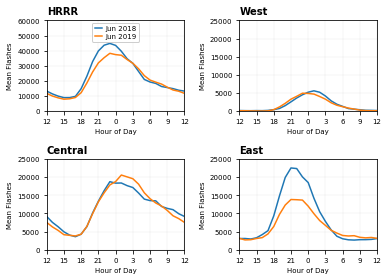

In [12]:
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

#for i, DOMAIN in enumerate(['HRRR']):
for ax, DOM in zip(axes, domains):
    print('Working on:', DOM)
    plt.sca(ax)
    for m in [6]:
        F2019 = get_HRRR_GLM_stats_hov_by_month(DOMAIN=DOM, month=m, years=[2019])['flashes']
        F2018 = get_HRRR_GLM_stats_hov_by_month(DOMAIN=DOM, month=m, years=[2018])['flashes']
        plt.plot(F2018, label='%s 2018' % datetime(2018, m, 1).strftime("%b"))
        plt.plot(F2019, label='%s 2019' % datetime(2018, m, 1).strftime("%b"))
    plt.xticks(np.array(range(0,25,3)), np.array(HOURS[::3]))
    plt.title(DOM, loc='left', fontweight='bold')
    plt.xlabel('Hour of Day')
    if DOM == 'HRRR':
        plt.ylim(ymax=60000)
        plt.legend(loc='upper center')
    else:
        plt.ylim(ymax=25000)
    plt.xlim([0,24])
    plt.ylim(ymin=0)
    plt.ylabel('Mean Flashes')
    plt.grid()

plt.tight_layout()

plt.savefig('./figs/not-shown_GLM-flashes-count-June2018_June2019')

# Total Flash Count
Also shows that over 99% of the GLM files were available for this period.

In [21]:
def get_total_flashes_by_month(DOMAIN, month, year=2018, verbose=True):
    samples = []
    total_flashes = []
    total_expected = []
    total_glm_files = []
    for hour in range(24):        
        FLASH_DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/HRRR_GLM_hit_rate_data/'
        FLASH_FILE = '/GLM_in_HRRR_%s_%s_m%02d_h%02d.csv' % (DOMAIN, year, month, hour)
                
        flash_data = np.genfromtxt(FLASH_DIR+FLASH_FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')
        samples.append(len(flash_data['DATE']))

        flashes = flash_data['GLM_FLASH_COUNT']
        glm_files = flash_data['NUM_FILES']
        expected = flash_data['EXPECTED_FILES']
        
        total_flashes.append(np.nansum(flashes))
        total_expected.append(np.nansum(expected))
        total_glm_files.append(np.nansum(glm_files))

        #if hour == 0:
        #    total_flashes_HOV = np.array(total_flashes)
        #else:
        #    total_flashes_HOV = np.vstack([total_flashes_HOV, total_flashes])
                
    return {'samples': np.array(samples),
            'flashes': np.array(total_flashes),
            'files': np.array(total_glm_files),
            'expected': np.array(total_expected)
           }

In [27]:
domain_totals_2018 = {}
for DOM in domains:
    m_total = []
    for m in range(5,10):
        total = np.nansum(get_total_flashes_by_month(DOM, m, year=2018)['flashes'])
        m_total.append(total)
    domain_totals_2018[DOM] = np.array(m_total)
    
domain_totals_2019 = {}
for DOM in domains:
    m_total = []
    for m in range(5,10):
        total = np.nansum(get_total_flashes_by_month(DOM, m, year=2019)['flashes'])
        m_total.append(total)
    domain_totals_2019[DOM] = np.array(m_total)

In [28]:
domain_totals_2018, domain_totals_2019

({'HRRR': array([10662504., 16424099., 18680608., 16485578.,  7789075.]),
  'West': array([ 907649., 1265280., 3489335., 3659223., 1322745.]),
  'Central': array([6669453., 8220603., 6867495., 5785130., 3144692.]),
  'East': array([2572223., 6108431., 7155093., 5769538., 2708718.])},
 {'HRRR': array([11810907., 15245475., 16575108., 16426392.,  7936071.]),
  'West': array([ 323187., 1223900., 2844608., 3094926., 1811878.]),
  'Central': array([8169792., 8344334., 6288549., 6817318., 3955565.]),
  'East': array([2686744., 4697720., 6250675., 5281274., 1687139.])})

Text(0, 0.5, 'Total Flashes (million)')

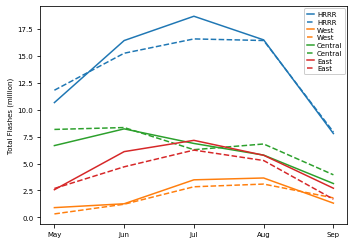

In [31]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for color, DOM in zip(colors, domain_totals_2018):
    plt.plot(range(5,10), domain_totals_2018[DOM]/1e6, label=DOM, color=color)
    plt.plot(range(5,10), domain_totals_2019[DOM]/1e6, label=DOM, linestyle='--', color=color)
plt.xticks(range(5,10), ['May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.legend()
plt.ylabel('Total Flashes (million)')

In [51]:
print('{:^10}{:^15}{:^15}{:^15}'.format('Domain', '2018', '2019', 'Total'))
print('-----------------------------------------------------------')
for D in domain_totals_2018:
    sum_2018 = np.nansum(domain_totals_2018[D])
    sum_2019 = np.nansum(domain_totals_2019[D])
    sum_total = sum_2018+sum_2019
    print('{:10}{:15,}{:15,}{:15,}'.format(D, sum_2018, sum_2019, sum_total))

  Domain       2018           2019           Total     
-----------------------------------------------------------
HRRR         70,041,864.0   67,993,953.0  138,035,817.0
West         10,644,232.0    9,298,499.0   19,942,731.0
Central      30,687,373.0   33,575,558.0   64,262,931.0
East         24,314,003.0   20,603,552.0   44,917,555.0


In [116]:
# Percent of GLM files available: 99% files
domain_files = {}
for DOM in domains:
    file_total = []
    expe_total = []
    for m in range(5,10):
        total_file = np.nansum(get_total_flashes_by_month(DOM, m)['files'])
        total_expe = np.nansum(get_total_flashes_by_month(DOM, m)['expected'])
        file_total.append(total_file)
        expe_total.append(total_expe)
    domain_files[DOM] = np.nansum(file_total)/np.nansum(expe_total)

print('GLM File Available')
for D in domain_totals:
    print('{:10}{:.2f}%'.format(D, domain_files[D]*100))

GLM File Available
HRRR      99.24%
West      99.24%
Central   99.24%
East      99.24%
